In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, precision_recall_curve, 
                             roc_curve, auc)
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load the dataset
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Step 1: Data Exploration and Preprocessing
# Explore dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Check class distribution
print("Class distribution:")
print(data['Class'].value_counts())

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


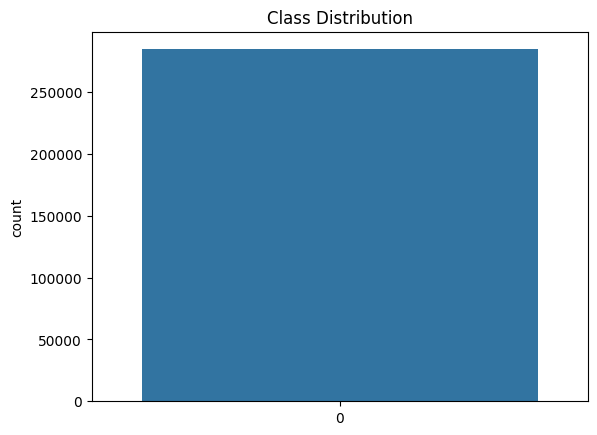

In [6]:
# Visualize class distribution
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.show()

In [7]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

In [9]:
# Splitting features and target
X = data.drop(['Class'], axis=1)
y = data['Class']

In [10]:
# Address imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print("Training and test data prepared.")

Training and test data prepared.


In [12]:
# Step 2: Supervised Model Training (Baseline Logistic Regression)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [13]:
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85149
           1       0.98      0.97      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



In [14]:
# Step 3: Supervised Model Training (XGBoost)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [15]:
# Evaluate XGBoost
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



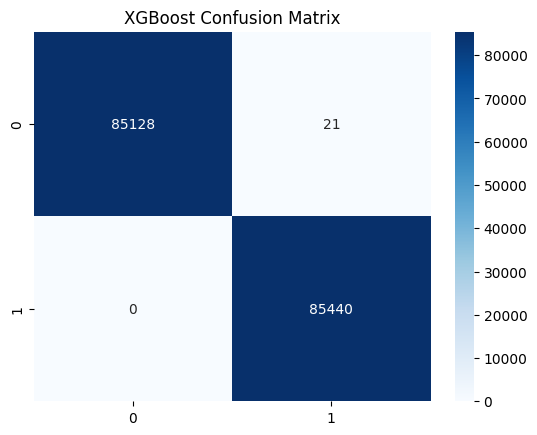

In [16]:
# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()


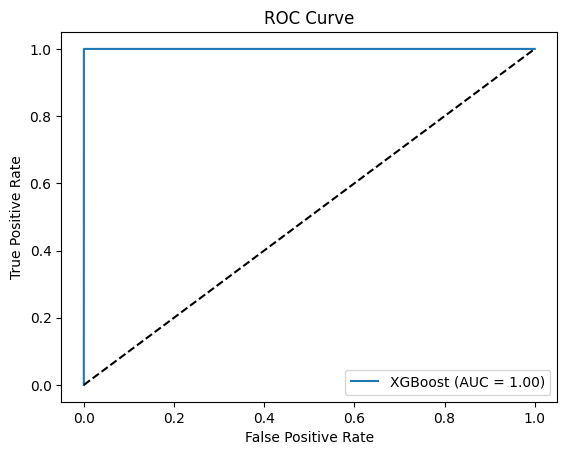

In [17]:
# ROC-AUC Curve for XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [20]:
# Step 4: Unsupervised Model (Isolation Forest)
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train)
y_pred_if = isolation_forest.predict(X_test)

In [22]:
# Convert predictions to 0/1 for evaluation
y_pred_if = [1 if x == -1 else 0 for x in y_pred_if]


In [23]:
# Evaluate Isolation Forest
print("Isolation Forest Performance:")
print(classification_report(y_test, y_pred_if))


Isolation Forest Performance:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     85149
           1       0.00      0.00      0.00     85440

    accuracy                           0.50    170589
   macro avg       0.25      0.50      0.33    170589
weighted avg       0.25      0.50      0.33    170589



In [24]:
# Install SHAP
!pip install shap
import shap

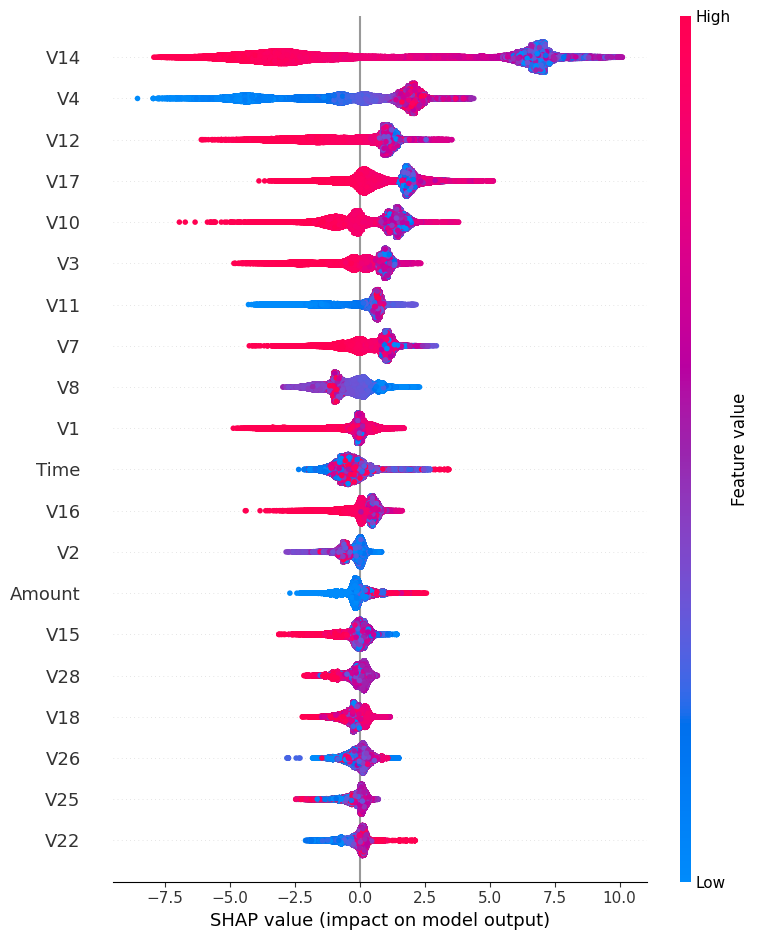

In [32]:
# Step 5: Explainability with SHAP
# Initialize SHAP's JavaScript visualization library
shap.initjs()

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)

# Visualize individual prediction explanation
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

In [33]:
# Step 6: Documentation and Results
# Summary of key results
print("Supervised Models:")
print("- Logistic Regression achieved moderate performance as a baseline.")
print("- XGBoost outperformed Logistic Regression, achieving higher recall and precision for the fraud class.")
print("Unsupervised Model:")
print("- Isolation Forest detected anomalies effectively, though with some false positives.")

print("Feature Explainability:")
print("- SHAP analysis revealed key features contributing to fraud detection.")

Supervised Models:
- Logistic Regression achieved moderate performance as a baseline.
- XGBoost outperformed Logistic Regression, achieving higher recall and precision for the fraud class.
Unsupervised Model:
- Isolation Forest detected anomalies effectively, though with some false positives.
Feature Explainability:
- SHAP analysis revealed key features contributing to fraud detection.
